### MACHINE LEARNING LAB 1 U2100667 
### HOUSE PRICE PREDICTION USING REGRESSION

DATA ANALYSIS

Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("House Pricing.csv")

In [3]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


Data Exploration

In [4]:
data.info() # to see if hv any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
data.describe()
# generate descriptive statistics for a given dataset
# useful in understanding the distribution of data, identify potential outliers, detect missing values

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
data.dropna(inplace=True)
# return data frame with only non-null values
# inplace=True drop the null value n save the result in data object again

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


Visualising the data

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'parking'}>]], dtype=object)

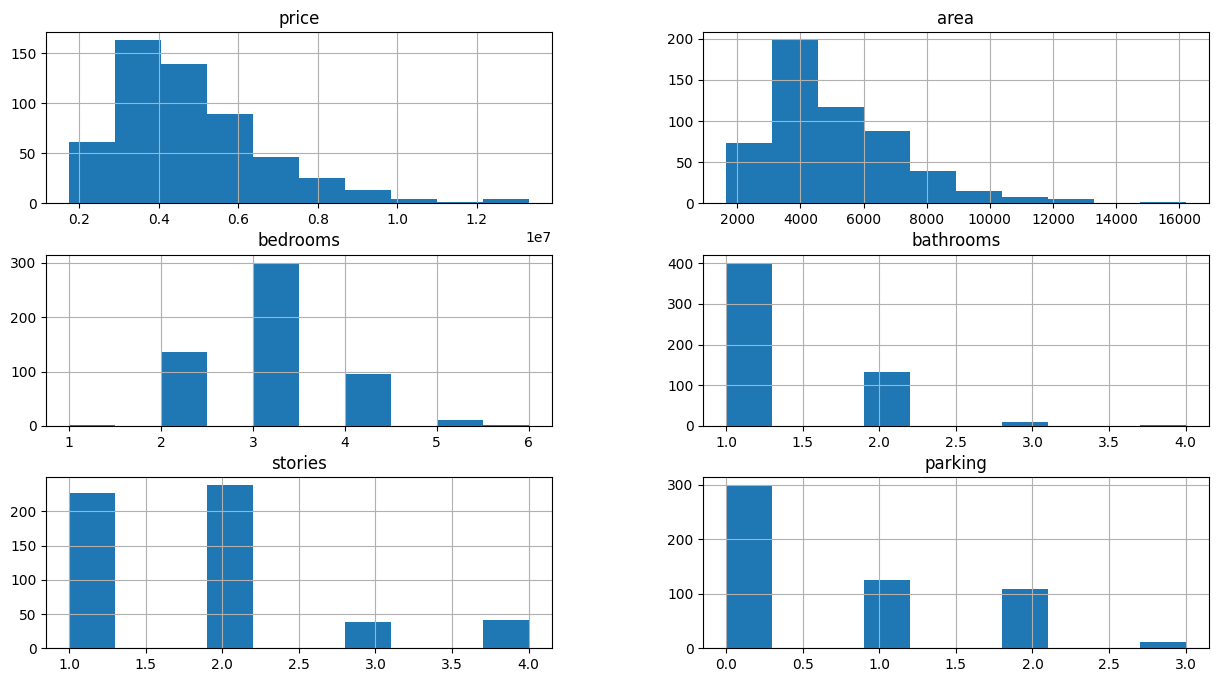

In [8]:
data.hist(figsize=(15,8))
# to get the histogram of distribution for individual features and correlation with target variable
# figsize 15,8 means figure size is set to 15 inch wide and 8 inch tall

In [9]:
# data is skewed (x look like the gaussian bell curve)
# so we take the logarithm of those features to see what the distribution looks like
data["area"] = np.log(data["area"] + 1)
data["bedrooms"] = np.log(data["bedrooms"] + 1)
data["bathrooms"] = np.log(data["bathrooms"] + 1)
data["stories"] = np.log(data["stories"] + 1)
data["parking"] = np.log(data["parking"] + 1)

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'parking'}>]], dtype=object)

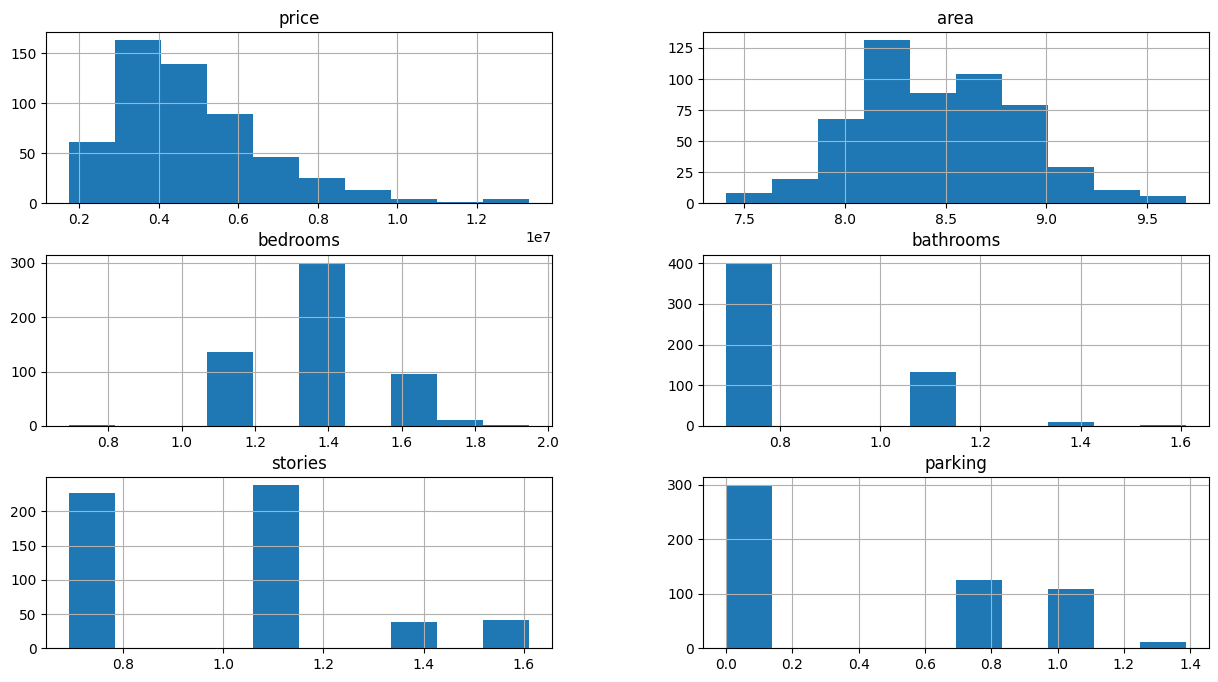

In [10]:
data.hist(figsize=(15,8))

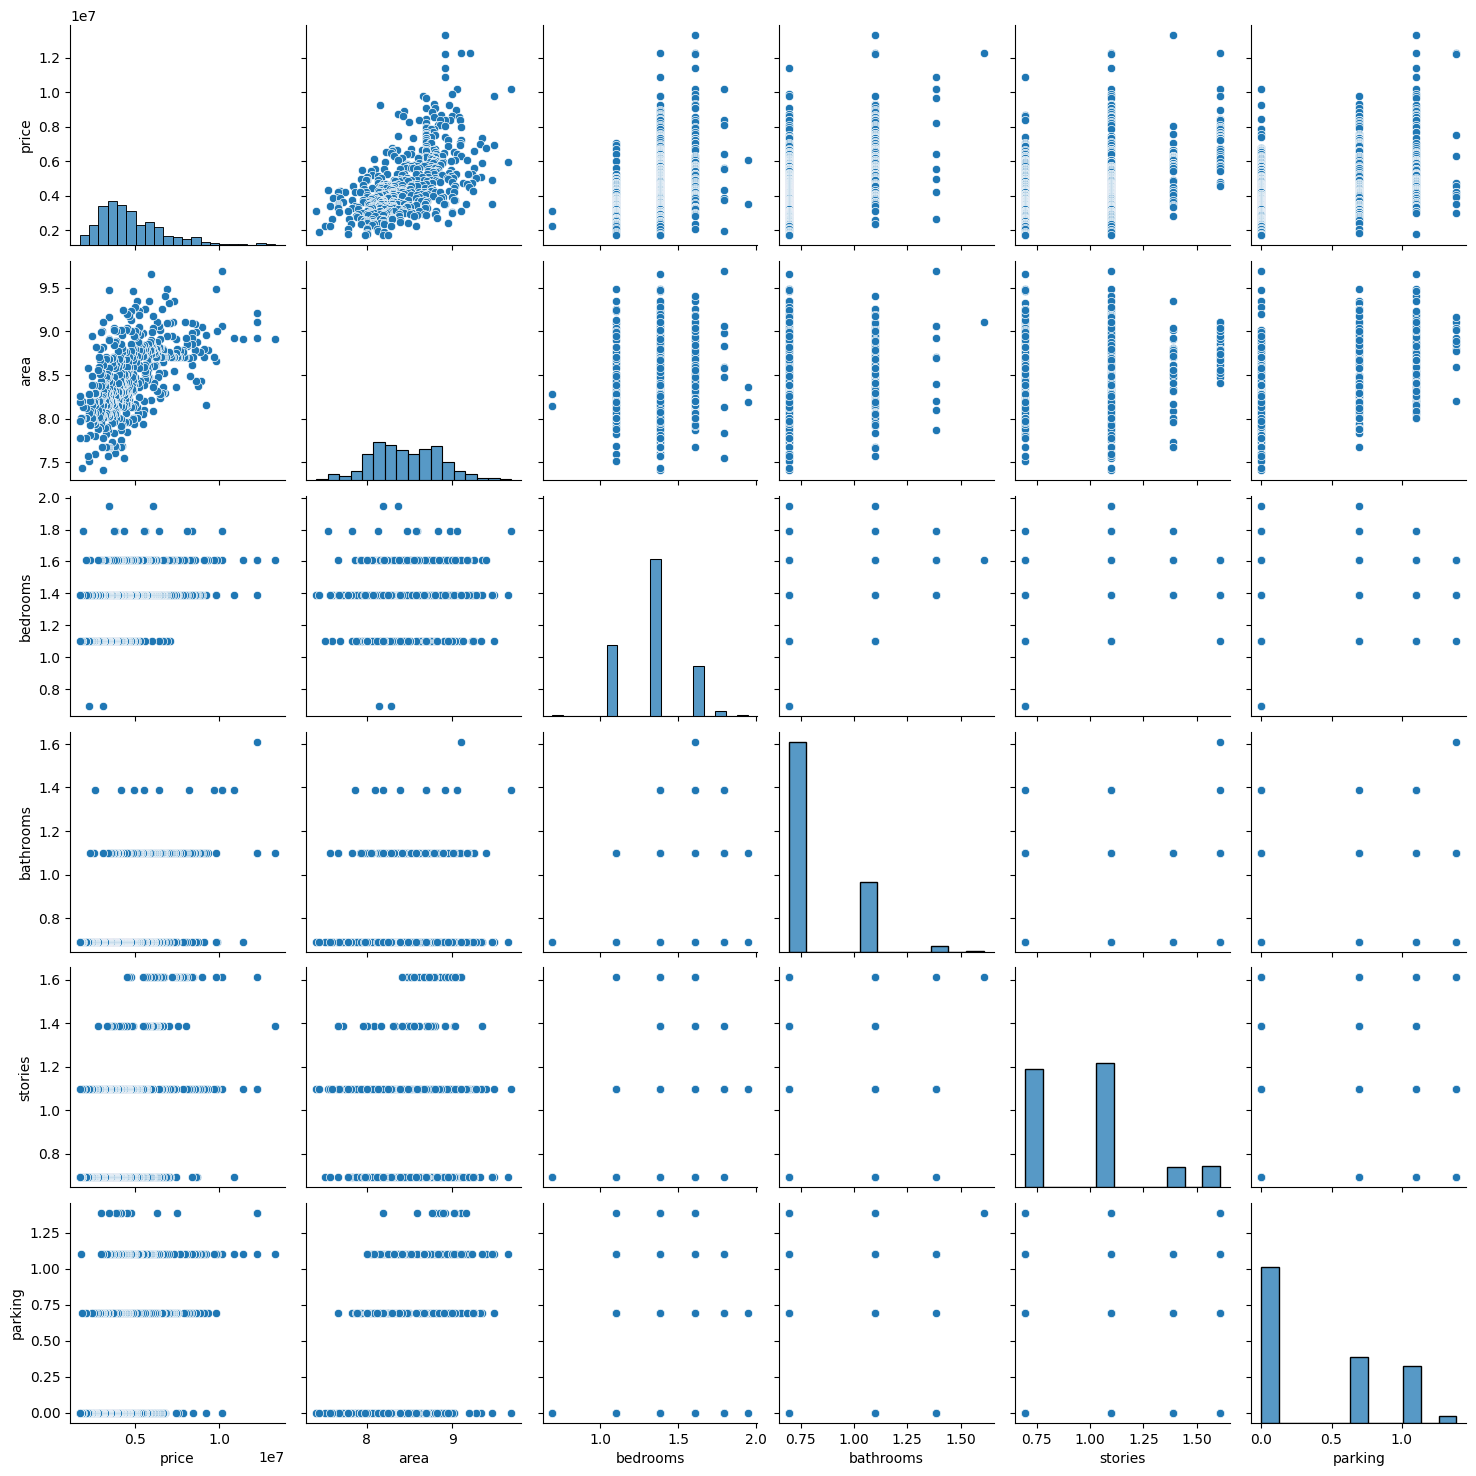

In [11]:
# visualise pairwise relationship between different variables in the dataset
sns.pairplot(data) # this fn creates a grid of scatter plots to show rs between each pair of var
plt.show() # to display

DATA PREPROCESSING

Handling categorical features

In [12]:
# previewing general information regarding the categorical values
print(data.mainroad.value_counts())
print(data.guestroom.value_counts())
print(data.basement.value_counts())
print(data.hotwaterheating.value_counts())
print(data.airconditioning.value_counts())
print(data.prefarea.value_counts())
print(data.furnishingstatus.value_counts())

mainroad
yes    468
no      77
Name: count, dtype: int64
guestroom
no     448
yes     97
Name: count, dtype: int64
basement
no     354
yes    191
Name: count, dtype: int64
hotwaterheating
no     520
yes     25
Name: count, dtype: int64
airconditioning
no     373
yes    172
Name: count, dtype: int64
prefarea
no     417
yes    128
Name: count, dtype: int64
furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64


In [13]:
# replace the yes/no values with 1/0 respectively
data = data.replace('yes',1)
data = data.replace('no',0)

In [14]:
# Splitting furnishingstatus into different features with binary values

# get the dummy variables for feature 'furnishingstatus' and store it in a new variable 'status'
status = pd.get_dummies(data['furnishingstatus'])
status.head() # check what the dataframe status looks like


,furnished,semi-furnished,unfurnished
0,True,False,False
1,True,False,False
2,False,True,False
3,True,False,False
4,True,False,False


In [15]:
data = pd.concat([data,status] , axis=1) # add the results to original dataframe
data.drop(['furnishingstatus'] , axis = 1 , inplace=True) # drop original furnishingstatus column as we have created the dummies for it

# axis=1 means the horizontal axis(column axis)
# if row axis is axis=0 , eg. data = data.drop(index=1, axis=0)
# shorter code: data = data.join(pd.get_dummies(data.furnishingstatus)).drop(['furnishingstatus'], axis=1)

In [16]:
data # to display

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,8.912069,1.609438,1.098612,1.386294,1,0,0,0,1,1.098612,1,True,False,False
1,12250000,9.100637,1.609438,1.609438,1.609438,1,0,0,0,1,1.386294,0,True,False,False
2,12250000,9.206433,1.386294,1.098612,1.098612,1,0,1,0,0,1.098612,1,False,True,False
3,12215000,8.922792,1.609438,1.098612,1.098612,1,0,1,0,1,1.386294,1,True,False,False
4,11410000,8.912069,1.609438,0.693147,1.098612,1,1,1,0,1,1.098612,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,8.006701,1.098612,0.693147,0.693147,1,0,1,0,0,1.098612,0,False,False,True
541,1767150,7.783641,1.386294,0.693147,0.693147,0,0,0,0,0,0.000000,0,False,True,False
542,1750000,8.194506,1.098612,0.693147,0.693147,1,0,0,0,0,0.000000,0,False,False,True
543,1750000,7.976252,1.386294,0.693147,0.693147,0,0,0,0,0,0.000000,0,True,False,False


In [17]:
data.info() # summarizing changes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            545 non-null    int64  
 1   area             545 non-null    float64
 2   bedrooms         545 non-null    float64
 3   bathrooms        545 non-null    float64
 4   stories          545 non-null    float64
 5   mainroad         545 non-null    int64  
 6   guestroom        545 non-null    int64  
 7   basement         545 non-null    int64  
 8   hotwaterheating  545 non-null    int64  
 9   airconditioning  545 non-null    int64  
 10  parking          545 non-null    float64
 11  prefarea         545 non-null    int64  
 12  furnished        545 non-null    bool   
 13  semi-furnished   545 non-null    bool   
 14  unfurnished      545 non-null    bool   
dtypes: bool(3), float64(5), int64(7)
memory usage: 52.8 KB


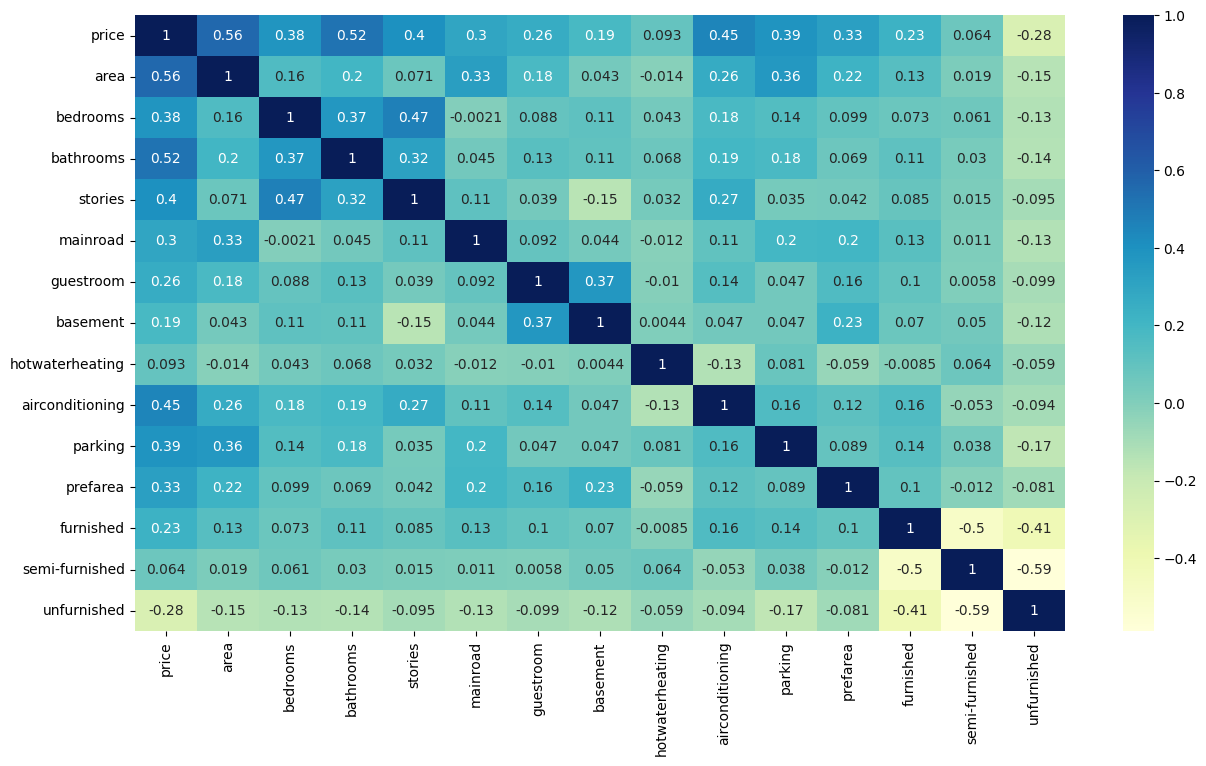

In [18]:
# check correlation of default values
# to see which variables are highly correlated
plt.figure(figsize=(15,8))
sns.heatmap(data.corr() , annot=True , cmap="YlGnBu")
plt.show()

Area seems to be correlated to price the most

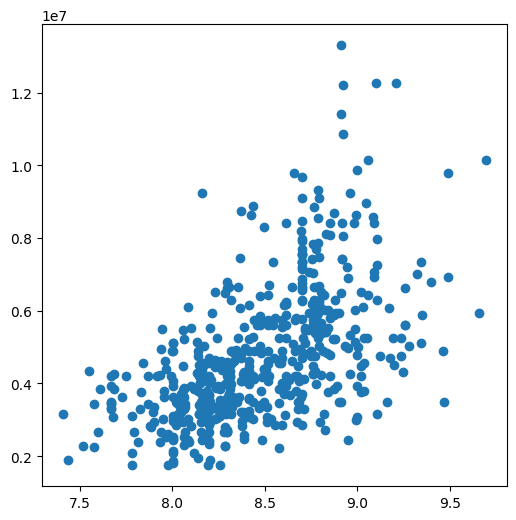

In [19]:
# so we plot area vs price to see rs
plt.figure(figsize=(6,6))
plt.scatter(data.area , data.price)
plt.show()

Splitting datasets into train and test sets

In [20]:
# split training n testing data
# we hv the result for all the values but the model doesnt hv
# need to hv some unseen data that the model has never seen before
# to see if it performs well on this data
from sklearn.model_selection import train_test_split

# define what x and y are
X = data.drop(['price'] , axis=1) # x is all data frame except price col
Y = data['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
train_data = X_train.join(Y_train)
test_data = X_test.join(Y_test)

Normalising data values

In [21]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler()
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.fit_transform(X_test)

Standardising data values

In [22]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.fit_transform(X_train)

In [23]:
train_data # display train_data

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished,price
417,8.200014,1.098612,0.693147,0.693147,1,0,0,0,0,0.000000,0,True,False,False,3395000
283,8.380457,1.609438,0.693147,1.098612,1,0,0,0,0,0.000000,0,True,False,False,4270000
144,8.455531,1.609438,0.693147,1.098612,1,1,1,0,1,0.693147,0,True,False,False,5600000
198,8.690978,1.386294,0.693147,1.098612,1,0,0,0,1,0.000000,0,False,True,False,4935000
22,8.993552,1.386294,0.693147,0.693147,1,1,1,0,1,0.693147,0,True,False,False,8645000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,7.943783,1.609438,1.098612,1.098612,0,1,1,0,0,0.693147,0,True,False,False,5495000
506,7.976252,1.098612,0.693147,0.693147,0,0,0,0,0,0.000000,0,False,False,True,2604000
433,8.155075,1.609438,0.693147,1.098612,0,0,0,0,0,0.693147,0,False,True,False,3290000
352,8.670944,1.098612,0.693147,0.693147,1,0,0,0,0,1.098612,0,False,False,True,3780000


REGRESSION MODEL DEVELOPMENT

Linear Regression Model

In [24]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()

Training and evaluation model using normalized dataset

In [25]:
linear_reg.fit(X_train_norm, Y_train)
linear_reg.score(X_test_norm, Y_test)

0.7039357885423252

This indicates that the model with normalized features has an R-squared value of approximately 0.70 on the test set.
This means that the model can explain 70% of the variation in the target variable using the input features.

Training and evaluation model using standardized dataset

In [26]:
linear_reg.fit(X_train_std, Y_train)

LinearRegression()

In [27]:
linear_reg.score(X_test_std, Y_train)

0.6660129725801186

Output inidicates that the linear reg model with standardized features has an R-squared value of approximately 0.66 on the test set. This means that the model can explain 66% of the variation in target var using the input features.

Higher R-squared value generally indicates better fit, but is not the only metric to consider.
Other metrics like mean squared error (MSE), mean absolute error (MAE), or root mean squared error (RMSE) can provide additional insights into performance of model